# ESTUDIO DE CODIGO DE RED 

# PUERTAS Y VIDRIOS DE MATAMOROS (THERMATRU PLANTA 1)

#### START TIME: 13/NOV/23
#### END TIME: 20/NOV/23

# El presente formato esta adaptado de acuerdo a lo que pide el plan de trabajo del Codigo de Red 2022 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [4]:
xslx = pd.ExcelFile("CDR_THERMATRU23.xlsx")

pf= pd.read_excel(xslx, "pf_ok")
unb= pd.read_excel(xslx, "unb_ok")
harm= pd.read_excel(xslx, "harm_ok")
pst1= pd.read_excel(xslx, "pst_ok")
plt1= pd.read_excel(xslx, "plt_ok")
#i1= pd.read_excel(xslx, "c1")
vl=pd.read_excel(xslx, "vmt_ok")
freq=pd.read_excel(xslx, "freq_ok")

In [5]:
pf.head()

,Fecha,TPF
0,2023-11-13 10:00:00,0.945970
1,2023-11-13 10:05:00,0.962821
2,2023-11-13 10:10:00,0.956260
3,2023-11-13 10:15:00,0.944722
4,2023-11-13 10:20:00,0.939936


In [15]:
#pf2.head()

In [16]:
#unb.head()

In [17]:
#i1.head()

# 3.4 Factor de Potencia

## Evaluacion de factor de potencia ( 5 min )

In [6]:
tpf= pf['TPF']

tpf.describe(percentiles=[0.05, 0.95, 0.99])

count    2017.000000
mean        0.937992
std         0.031835
min         0.813780
5%          0.886222
50%         0.938242
95%         0.993907
99%         0.999387
max         0.999941
Name: TPF, dtype: float64

In [7]:
pf_ev= pf['TPF']

pf_ev.value_counts(bins=[0,0.95,1], normalize=True).mul(100).round(1).astype(str) + '%'

(-0.001, 0.95]    70.8%
(0.95, 1.0]       29.2%
Name: TPF, dtype: object

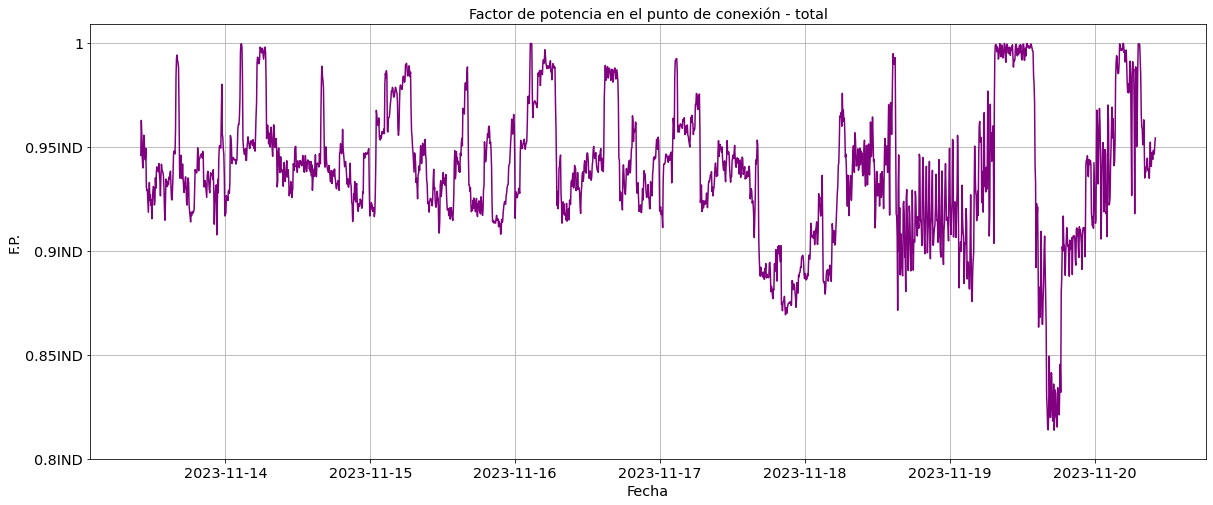

In [9]:
x1= pf['Fecha']

# Obtiene la información de la segunda columna del Excel
second_col = pf.iloc[:, 1].copy()  # Usa el método copy() para obtener una copia del DataFrame

# Itera a través de los valores de la columna
for i in range(len(second_col)):
    # Revisa si el valor es positivo
    if second_col[i] > 0:
        # Si el valor es positivo, se le resta a 2
        second_col[i] = 2 - second_col[i]
    # Revisa si el valor es negativo
    elif second_col[i] < 0:
        # Multiplica el valor por -1 para hacerlo positivo
        second_col[i] *= -1

# Actualiza la segunda columna de datos en el DataFrame original
pf.iloc[:, 1] = second_col


plt.figure(figsize=(20,8))
plt.plot(x1, pf.iloc[:, 1], color='purple', label='FP')

plt.title('Factor de potencia en el punto de conexión - total')
plt.xlabel('Fecha')
plt.ylabel('F.P.')

# Configurar el eje "y" en casos donde el FP no baje de 0.9 en IND y CAP
plt.yticks([ 0.8, 0.85, 0.9, 0.95, 1],
          [ '0.8IND', '0.85IND', '0.9IND', '0.95IND', '1'])



plt.grid()

plt.show()

# 3.8 Calidad de la potencia

In [14]:
x1= vl['Fecha']

vaavg= vl['VAB']
vbavg= vl['VBC']
vcavg= vl['VCA']


In [15]:
vl.describe(percentiles=[0.05, 0.95, 0.99])

,VAB,VBC,VCA
count,10081.000000,10081.000000,10081.000000
mean,13631.761181,13685.128416,13624.154765
std,320.829568,316.701239,324.055485
min,12822.930753,12904.441302,12830.587083
5%,13097.694088,13153.522415,13085.127412
50%,13694.474640,13746.455085,13686.307222
95%,14100.784445,14143.308410,14094.748690
99%,14223.662326,14269.108150,14218.448997
max,14293.861835,14332.704925,14282.208243


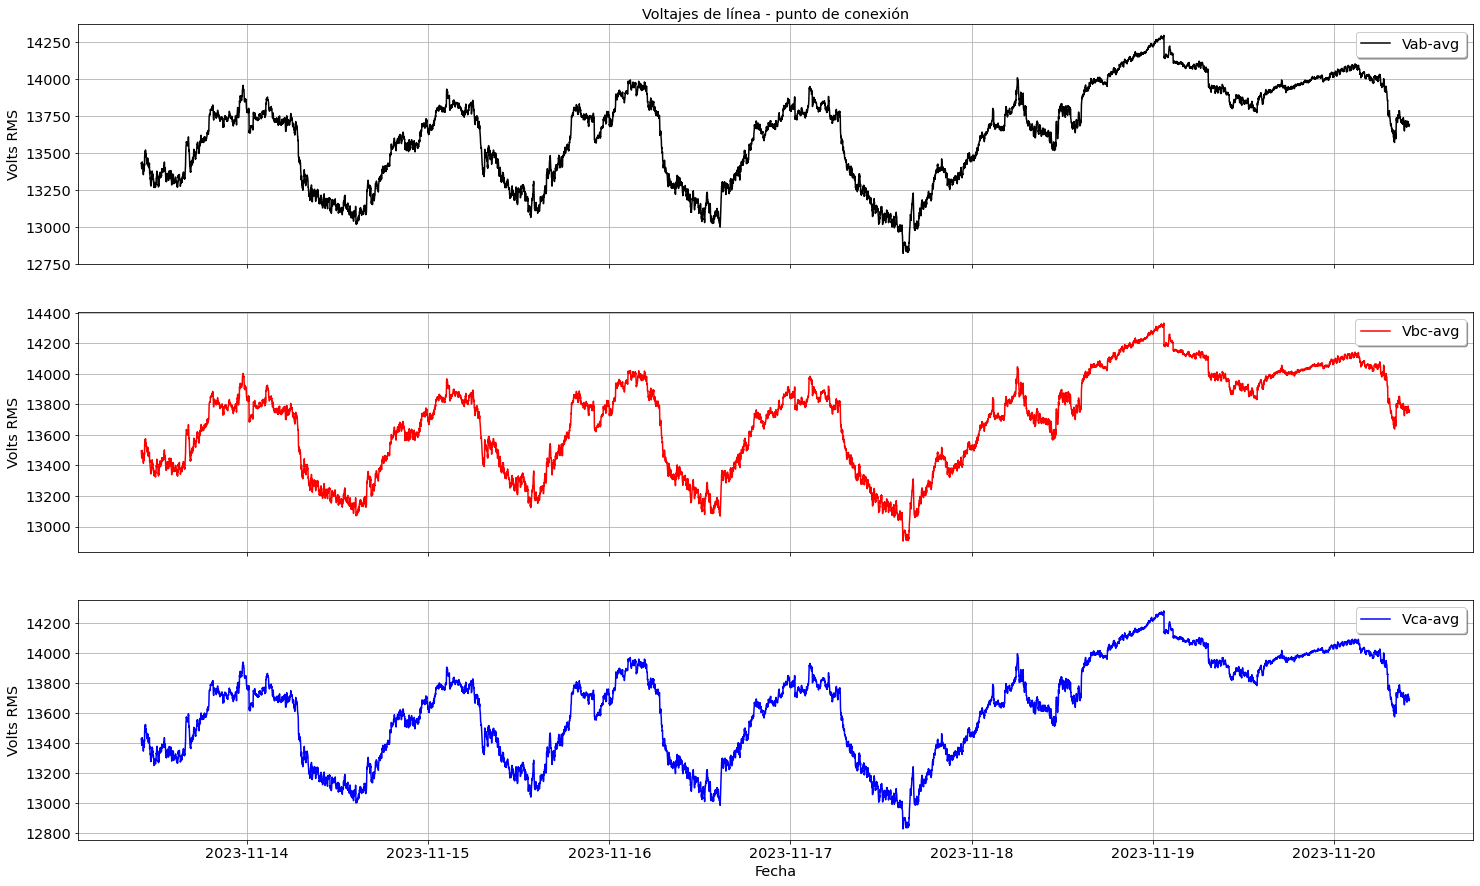

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots( 
    figsize=(25,15),
    nrows=3, ncols=1, sharex=True
)

#ax1.plot(x1, vamax, color ='black', label='Vab-max')
ax1.plot(x1, vaavg, color = 'black', label='Vab-avg')
#ax1.plot(x1, vamin, color = 'silver', label= 'Vab-min')

ax1.set_title('Voltajes de línea - punto de conexión')
#ax1.set_xlabel('Fecha')
ax1.set_ylabel('Volts RMS')


#ax2.plot(x1, vbmax, color ='maroon', label='Vbc-max')
ax2.plot(x1, vbavg, color = 'red', label='Vbc-avg')
#ax2.plot(x1, vbmin, color = 'salmon', label= 'Vbc-min')

#ax2.set_title('Perfil de voltaje de fase - B (Baja tension)')
#ax2.set_xlabel('Fecha')
ax2.set_ylabel('Volts RMS')

#ax3.plot(x1, vcmax, color ='midnightblue', label='Vca-max')
ax3.plot(x1, vcavg, color = 'blue', label='Vca-avg')
#ax3.plot(x1, vcmin, color = 'royalblue', label= 'Vca-min')

#ax3.set_title('Perfil de voltaje de fase - C (Baja tension)')
ax3.set_xlabel('Fecha')
ax3.set_ylabel('Volts RMS')

ax1.grid()
ax2.grid()
ax3.grid()

ax1.legend(shadow=True )
ax2.legend(shadow=True )
ax3.legend(shadow=True )

plt.show()


## Evaluacion de desbalance (10 min)

## 3.7.1 Desbalance de tensión

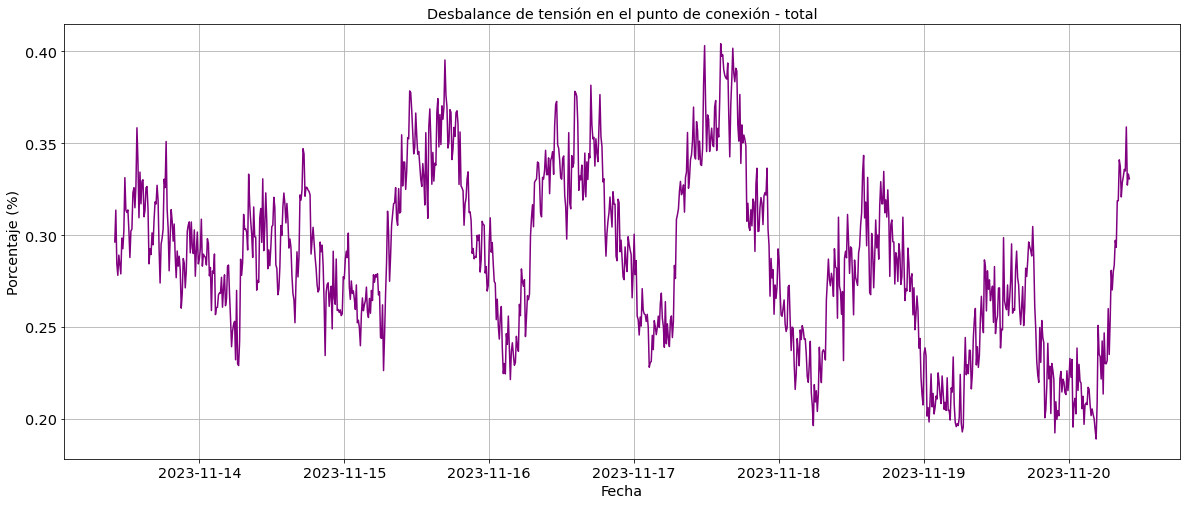

In [17]:
plt.figure(figsize=(20,8))
x1= unb['Fecha']
vunb= unb['%unb-v']
plt.plot(x1, vunb, color='purple')

plt.title('Desbalance de tensión en el punto de conexión - total')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid()
plt.show()

In [18]:
vunb.describe(percentiles=[0.05, 0.95, 0.99])

count    1009.000000
mean        0.286900
std         0.045391
min         0.189156
5%          0.209627
50%         0.286743
95%         0.362556
99%         0.388150
max         0.404187
Name: %unb-v, dtype: float64

## 3.7.1 Desbalance de corriente

## Evaluacion de desbalance (10 min)

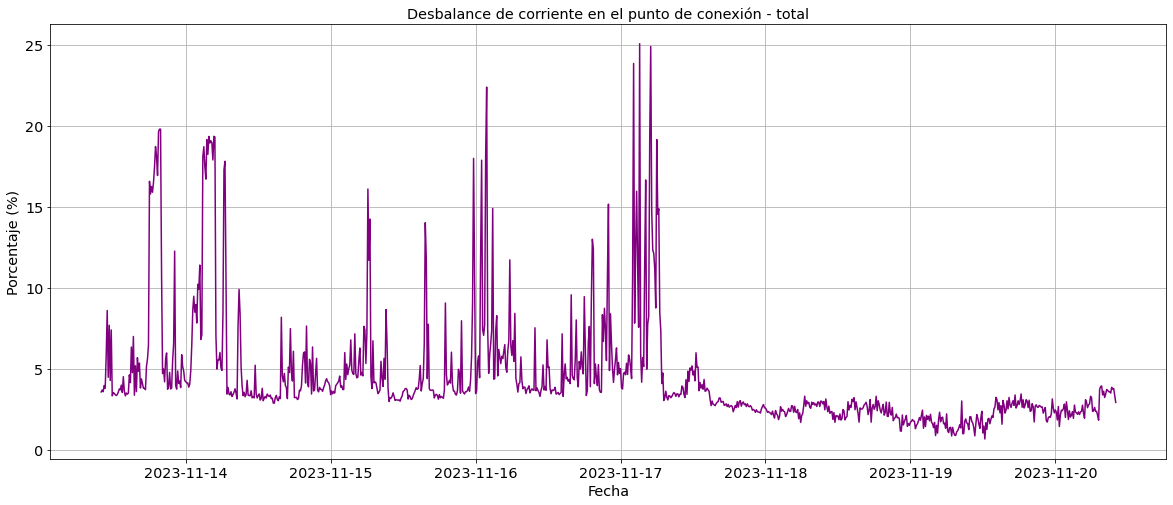

In [19]:
plt.figure(figsize=(20,8))
x1= unb['Fecha']
iunb= unb['%unb-i']
plt.plot(x1, iunb, color='purple')

plt.title('Desbalance de corriente en el punto de conexión - total')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid()
plt.show()

In [20]:
iunb.describe(percentiles=[0.05, 0.95, 0.99])

count    1009.000000
mean        4.465562
std         3.566683
min         0.673843
5%          1.674581
50%         3.480808
95%        12.227454
99%        19.169004
max        25.090438
Name: %unb-i, dtype: float64

In [21]:
#plt.figure(figsize=(20,8))
#x1= i1['Fecha']
#ia= i1['IA']
#ib= i1['IB']
#ic= i1['IC']

#plt.plot(x1, ia, color ='black', label='Fase A')
#plt.plot(x1, ib, color = 'firebrick', label='Fase B')
#plt.plot(x1, ic, color = 'blue', label= 'Fase C')


#plt.title('Tendencia de corrientes por fase en media tension')
#plt.xlabel('Fecha')
#plt.ylabel('Amperes RMS')
#plt.grid()
#plt.legend( shadow=True )
#plt.show()

## 3.7.2 Distorsión armónica

## 1. Evaluación de TDD

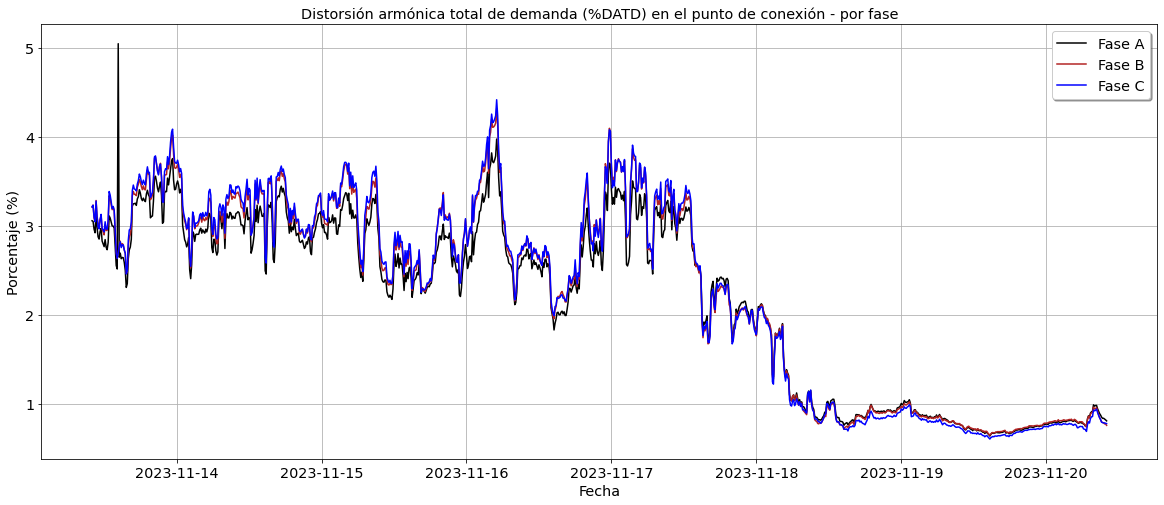

In [23]:
plt.figure(figsize=(20,8))
x1= harm['Fecha']
adatd= harm['A-%DATD']
bdatd= harm['B-%DATD']
cdatd= harm['C-%DATD']

plt.plot(x1, adatd, color ='black', label='Fase A')
plt.plot(x1, bdatd, color = 'firebrick', label='Fase B')
plt.plot(x1, cdatd, color = 'blue', label= 'Fase C')


plt.title('Distorsión armónica total de demanda (%DATD) en el punto de conexión - por fase')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid()
plt.legend( shadow=True )
plt.show()

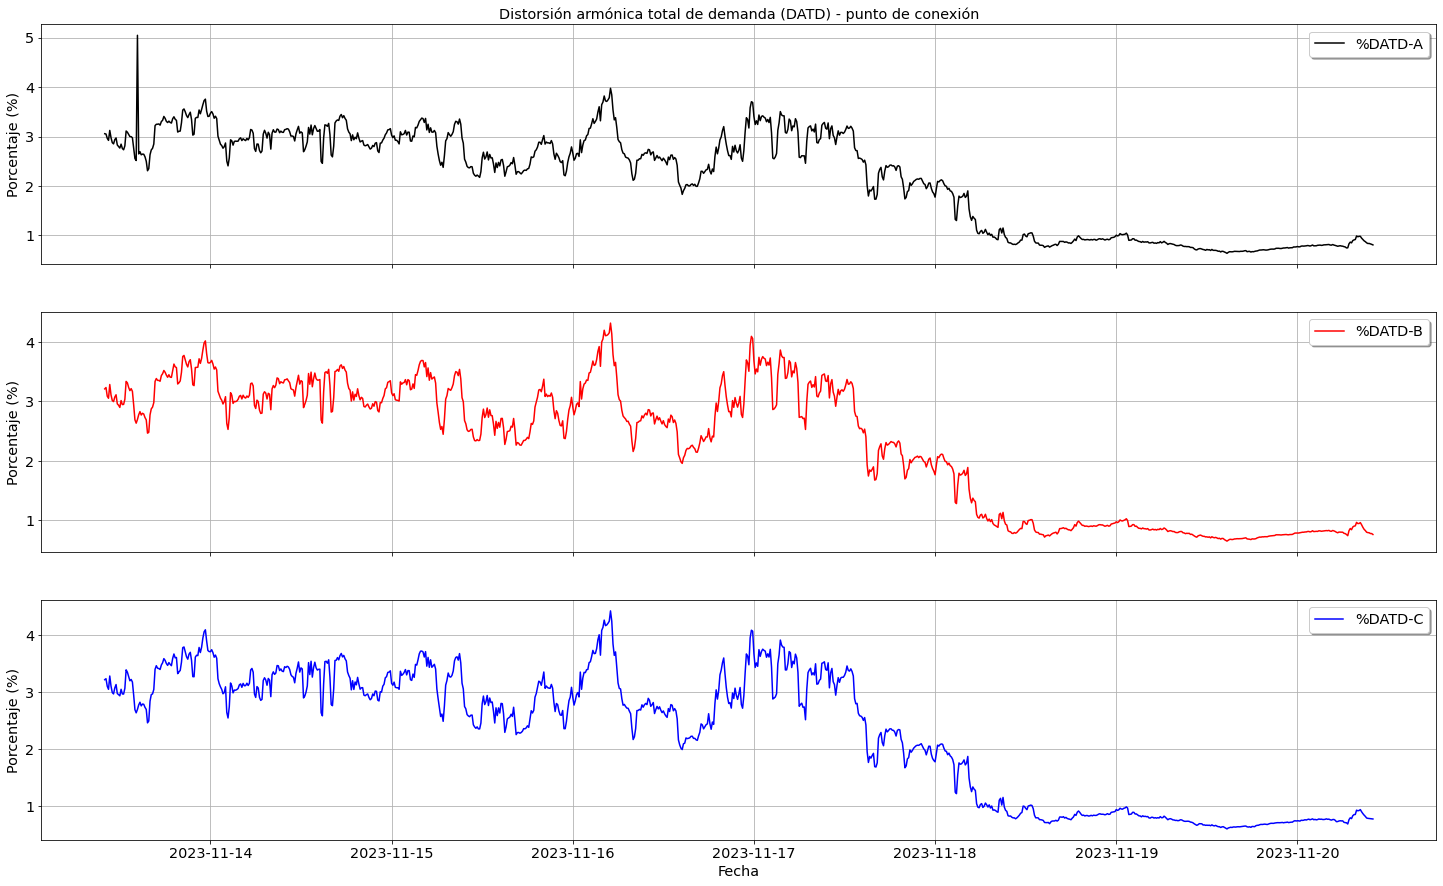

In [24]:
fig, (yx1, yx2, yx3) = plt.subplots( 
    figsize=(25,15),
    nrows=3, ncols=1, sharex=True
)

#ax1.plot(x1, vamax, color ='black', label='Vab-max')
yx1.plot(x1, adatd, color = 'black', label='%DATD-A')
#ax1.plot(x1, vamin, color = 'silver', label= 'Vab-min')

yx1.set_title('Distorsión armónica total de demanda (DATD) - punto de conexión')
#ax1.set_xlabel('Fecha')
yx1.set_ylabel('Porcentaje (%)')


#ax2.plot(x1, vbmax, color ='maroon', label='Vbc-max')
yx2.plot(x1, bdatd, color = 'red', label='%DATD-B')
#ax2.plot(x1, vbmin, color = 'salmon', label= 'Vbc-min')

#ax2.set_title('Perfil de voltaje de fase - B (Baja tension)')
#ax2.set_xlabel('Fecha')
yx2.set_ylabel('Porcentaje (%)')

#ax3.plot(x1, vcmax, color ='midnightblue', label='Vca-max')
yx3.plot(x1, cdatd, color = 'blue', label='%DATD-C')
#ax3.plot(x1, vcmin, color = 'royalblue', label= 'Vca-min')

#ax3.set_title('Perfil de voltaje de fase - C (Baja tension)')
yx3.set_xlabel('Fecha')
yx3.set_ylabel('Porcentaje (%)')

yx1.grid()
yx2.grid()
yx3.grid()

yx1.legend(shadow=True )
yx2.legend(shadow=True )
yx3.legend(shadow=True )

plt.show()

## FASE A

In [36]:
adatd.value_counts(bins=[0,8,20], normalize=True).mul(100).round(1).astype(str) + '%'

(-0.001, 8.0]    100.0%
(8.0, 20.0]        0.0%
Name: A-%DATD, dtype: object

In [37]:
adatd.describe(percentiles=[0.05, 0.95, 0.99])

count    1009.000000
mean        2.171164
std         0.989889
min         0.639363
5%          0.712418
50%         2.518299
95%         3.386797
99%         3.704359
max         5.047657
Name: A-%DATD, dtype: float64

## FASE B

In [38]:

bdatd.value_counts(bins=[0,12,20], normalize=True).mul(100).round(1).astype(str) + '%'

(-0.001, 12.0]    100.0%
(12.0, 20.0]        0.0%
Name: B-%DATD, dtype: object

In [39]:
bdatd.describe(percentiles=[0.05, 0.95, 0.99])

count    1009.000000
mean        2.271850
std         1.082230
min         0.648027
5%          0.721967
50%         2.631351
95%         3.654166
99%         4.018592
max         4.320194
Name: B-%DATD, dtype: float64

## FASE C

In [32]:

cdatd.value_counts(bins=[0,12,20], normalize=True).mul(100).round(1).astype(str) + '%'

(-0.001, 12.0]    100.0%
(12.0, 20.0]        0.0%
Name: C-%DATD, dtype: object

In [33]:
cdatd.describe(percentiles=[0.05, 0.95, 0.99])

count    1009.000000
mean        2.278891
std         1.113621
min         0.605588
5%          0.683463
50%         2.658201
95%         3.674112
99%         4.075287
max         4.418011
Name: C-%DATD, dtype: float64

## 2. Evaluación de componentes armónicas individuales

## Nota: Las armonicas ya se encuentran en % de IL de acuerdo a lo solicitado por el código de red.

In [35]:
ih=harm.describe(percentiles=[ 0.95, 0.99])
pd.set_option('display.max_columns', None)
ih

,A-2,B-2,C-2,A-3,B-3,C-3,A-4,B-4,C-4,A-5,B-5,C-5,A-6,B-6,C-6,A-7,B-7,C-7,A-8,B-8,C-8,A-9,B-9,C-9,A-10,B-10,C-10,A-11,B-11,C-11,A-12,B-12,C-12,A-13,B-13,C-13,A-14,B-14,C-14,A-15,B-15,C-15,A-16,B-16,C-16,A-17,B-17,C-17,A-18,B-18,C-18,A-19,B-19,C-19,A-20,B-20,C-20,A-21,B-21,C-21,A-22,B-22,C-22,A-23,B-23,C-23,A-24,B-24,C-24,A-25,B-25,C-25,A-26,B-26,C-26,A-27,B-27,C-27,A-28,B-28,C-28,A-29,B-29,C-29,A-30,B-30,C-30,A-31,B-31,C-31,A-32,B-32,C-32,A-33,B-33,C-33,A-34,B-34,C-34,A-35,B-35,C-35,A-36,B-36,C-36,A-37,B-37,C-37,A-38,B-38,C-38,A-39,B-39,C-39,A-40,B-40,C-40,A-41,B-41,C-41,A-42,B-42,C-42,A-43,B-43,C-43,A-44,B-44,C-44,A-45,B-45,C-45,A-46,B-46,C-46,A-47,B-47,C-47,A-48,B-48,C-48,A-49,B-49,C-49,A-50,B-50,C-50,A-%DATD,B-%DATD,C-%DATD
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,0.143281,0.148455,0.095571,0.304757,0.215967,0.230633,0.048161,0.050244,0.040952,1.744855,1.857641,1.823851,0.009389,0.010108,0.007552,0.916631,0.952955,1.018520,0.024075,0.028943,0.024109,0.056439,0.054472,0.054954,0.017851,0.022465,0.024087,0.423928,0.426510,0.450438,0.045354,0.045530,0.045821,0.345192,0.366635,0.387197,0.052658,0.054481,0.057751,0.104369,0.106850,0.119884,0.059196,0.060002,0.058327,0.325142,0.314076,0.303485,0.047699,0.047815,0.047628,0.213389,0.235687,0.234236,0.050567,0.048666,0.050216,0.079259,0.083370,0.082623,0.042257,0.042006,0.042018,0.162961,0.162888,0.159058,0.033631,0.033908,0.033808,0.114740,0.124187,0.120977,0.037060,0.037262,0.037510,0.047777,0.050257,0.054616,0.035708,0.036380,0.036392,0.094568,0.094314,0.091463,0.030210,0.031296,0.031237,0.081986,0.083475,0.084874,0.034108,0.034583,0.034635,0.038309,0.041612,0.041302,0.034185,0.034660,0.034734,0.068442,0.068829,0.065700,0.029535,0.030227,0.030151,0.052282,0.056048,0.056172,0.033687,0.034067,0.034257,0.034870,0.035157,0.035893,0.033693,0.034056,0.034237,0.051592,0.051123,0.050239,0.029484,0.030033,0.030133,0.046199,0.047570,0.047115,0.033673,0.034022,0.034168,0.033366,0.033589,0.035093,0.033604,0.033947,0.034189,0.049906,0.048331,0.048681,0.029520,0.029881,0.029944,0.045550,0.045488,0.045747,0.045550,0.045488,0.045747,2.171164,2.271850,2.278891
std,0.081452,0.083479,0.045964,0.079138,0.053607,0.067453,0.027103,0.028352,0.021807,0.834109,0.921785,

## 3.7.3 Fluctuaciones de tension

## Flicker PST

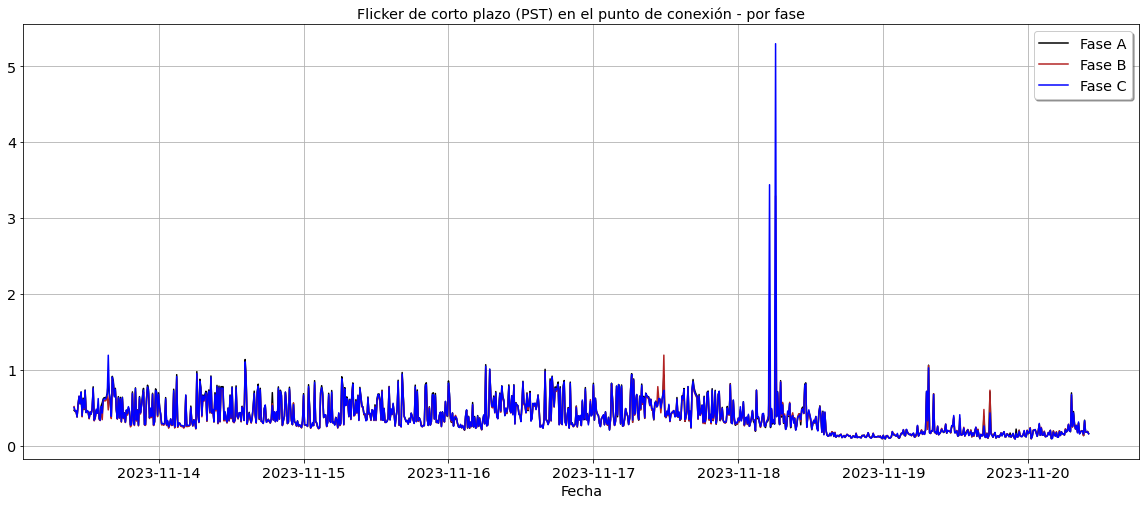

In [41]:
plt.figure(figsize=(20,8))
x1= pst1['Fecha']
psta= pst1['A-PST']
pstb= pst1['B-PST']
pstc= pst1['C-PST']

plt.plot(x1, psta, color ='black', label='Fase A')
plt.plot(x1, pstb, color = 'firebrick', label='Fase B')
plt.plot(x1, pstc, color = 'blue', label= 'Fase C')


plt.title('Flicker de corto plazo (PST) en el punto de conexión - por fase')
plt.xlabel('Fecha')
#plt.ylabel('P.U.')
plt.grid()
plt.legend( shadow=True )
plt.show()

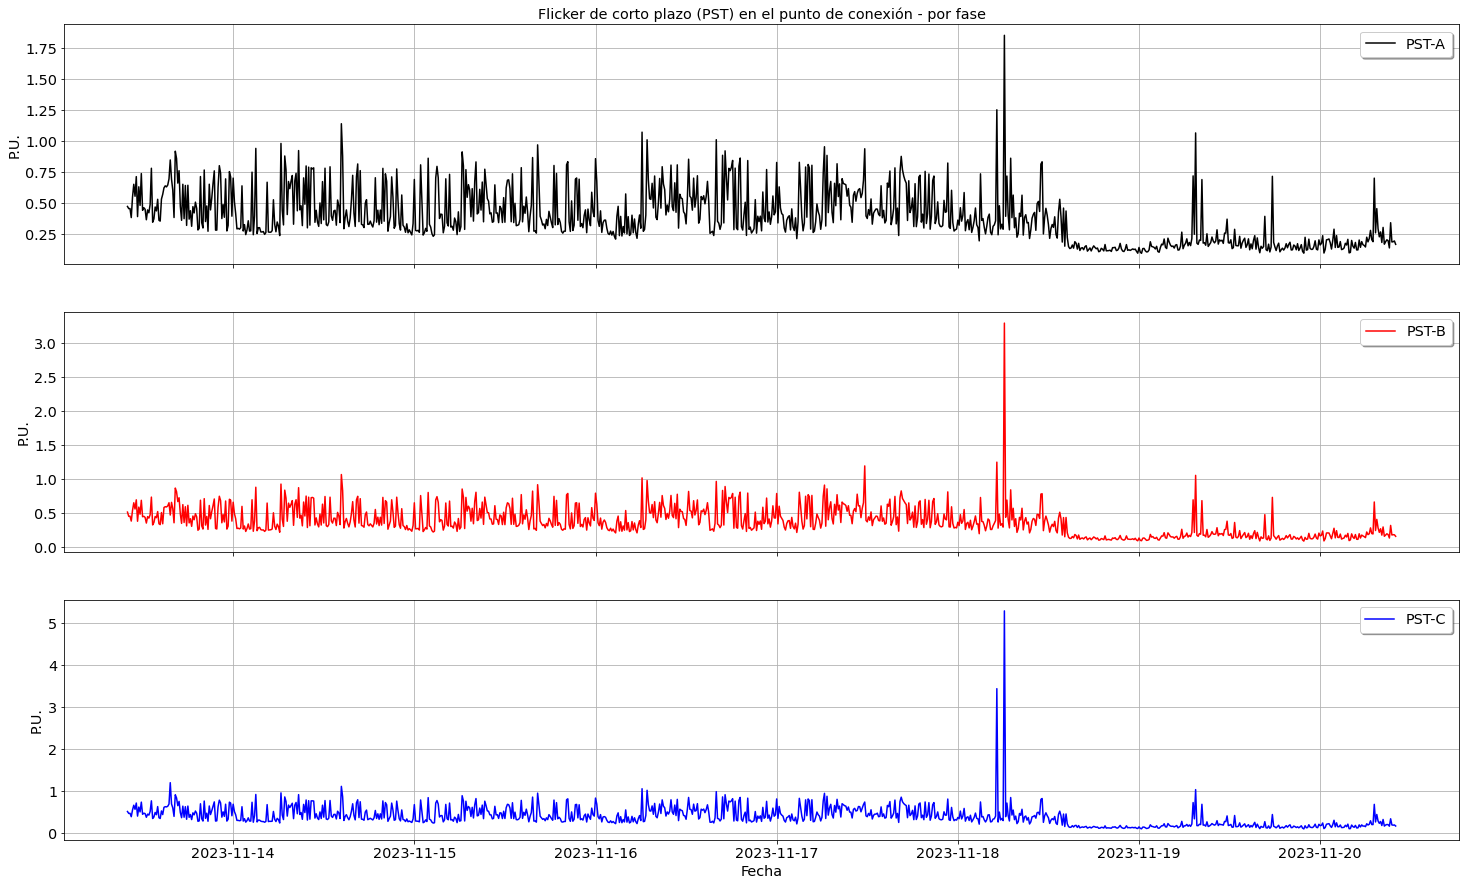

In [42]:

fig, (lx1, lx2, lx3) = plt.subplots( 
    figsize=(25,15),
    nrows=3, ncols=1, sharex=True
)


x1= pst1['Fecha']
psta= pst1['A-PST']
pstb= pst1['B-PST']
pstc= pst1['C-PST']

#ax1.plot(x1, vamax, color ='black', label='Vab-max')
lx1.plot(x1, psta, color = 'black', label='PST-A')
#ax1.plot(x1, vamin, color = 'silver', label= 'Vab-min')

lx1.set_title('Flicker de corto plazo (PST) en el punto de conexión - por fase')
#ax1.set_xlabel('Fecha')
lx1.set_ylabel('P.U.')


#ax2.plot(x1, vbmax, color ='maroon', label='Vbc-max')
lx2.plot(x1, pstb, color = 'red', label='PST-B')
#ax2.plot(x1, vbmin, color = 'salmon', label= 'Vbc-min')

#ax2.set_title('Perfil de voltaje de fase - B (Baja tension)')
#ax2.set_xlabel('Fecha')
lx2.set_ylabel('P.U.')

#ax3.plot(x1, vcmax, color ='midnightblue', label='Vca-max')
lx3.plot(x1, pstc, color = 'blue', label='PST-C')
#ax3.plot(x1, vcmin, color = 'royalblue', label= 'Vca-min')

#ax3.set_title('Perfil de voltaje de fase - C (Baja tension)')
lx3.set_xlabel('Fecha')
lx3.set_ylabel('P.U.')

lx1.grid()
lx2.grid()
lx3.grid()

lx1.legend(shadow=True )
lx2.legend(shadow=True )
lx3.legend(shadow=True )

plt.show()

In [43]:
pstt=pst1.describe(percentiles=[ 0.95, 0.99])
pd.set_option('display.max_columns', None)
pstt

,A-PST,B-PST,C-PST
count,1009.000000,1009.000000,1009.000000
mean,0.389341,0.383280,0.393201
std,0.216866,0.221294,0.274641
min,0.093798,0.093417,0.092462
50%,0.341470,0.339658,0.342719
95%,0.795599,0.751401,0.776699
99%,0.939913,0.913959,0.939487
max,1.852301,3.292785,5.296747


## Flicker PLT

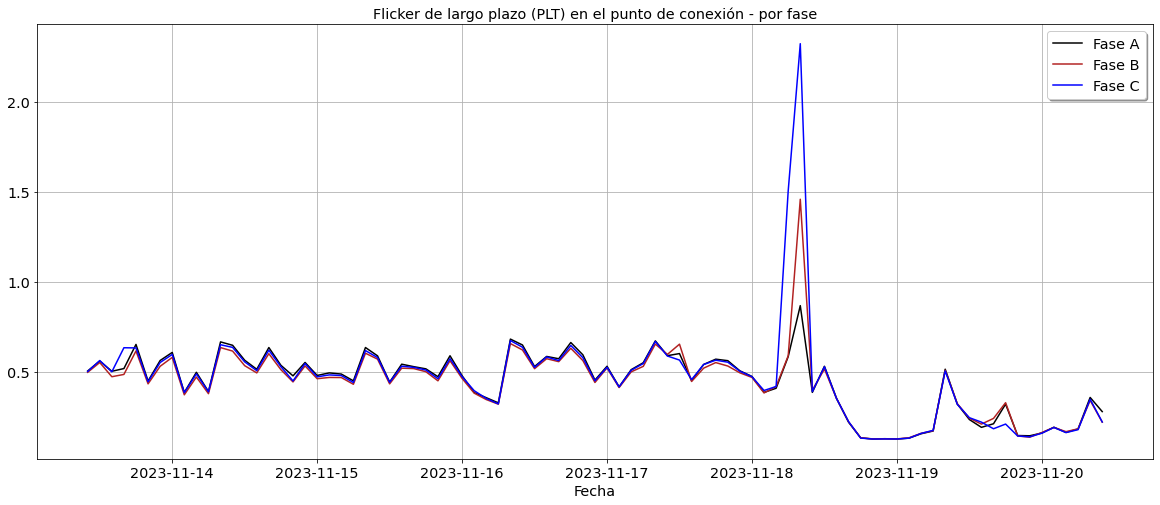

In [29]:
plt.figure(figsize=(20,8))
x1= plt1['Fecha']
plta= plt1['A-PLT']
pltb= plt1['B-PLT']
pltc= plt1['C-PLT']

plt.plot(x1, plta, color ='black', label='Fase A')
plt.plot(x1, pltb, color = 'firebrick', label='Fase B')
plt.plot(x1, pltc, color = 'blue', label= 'Fase C')


plt.title('Flicker de largo plazo (PLT) en el punto de conexión - por fase')
plt.xlabel('Fecha')
#plt.ylabel('PLT')
plt.grid()
plt.legend( shadow=True )
plt.show()

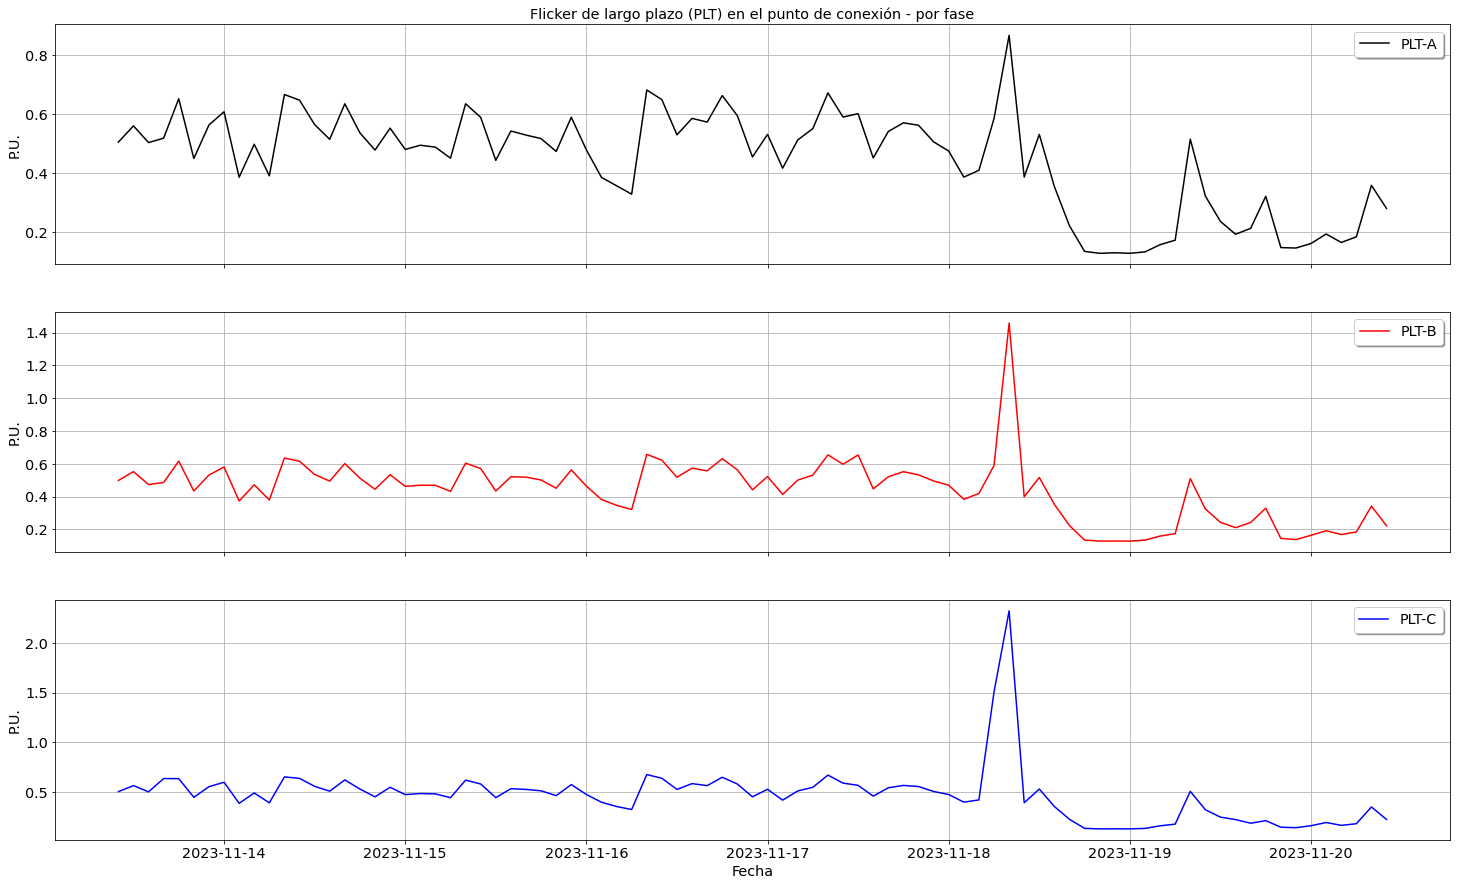

In [44]:

fig, (qx1, qx2, qx3) = plt.subplots( 
    figsize=(25,15),
    nrows=3, ncols=1, sharex=True
)


xd1= plt1['Fecha']
plta= plt1['A-PLT']
pltb= plt1['B-PLT']
pltc= plt1['C-PLT']

#ax1.plot(x1, vamax, color ='black', label='Vab-max')
qx1.plot(xd1, plta, color = 'black', label='PLT-A')
#ax1.plot(x1, vamin, color = 'silver', label= 'Vab-min')

qx1.set_title('Flicker de largo plazo (PLT) en el punto de conexión - por fase')
#ax1.set_xlabel('Fecha')
qx1.set_ylabel('P.U.')


#ax2.plot(x1, vbmax, color ='maroon', label='Vbc-max')
qx2.plot(xd1, pltb, color = 'red', label='PLT-B')
#ax2.plot(x1, vbmin, color = 'salmon', label= 'Vbc-min')

#ax2.set_title('Perfil de voltaje de fase - B (Baja tension)')
#ax2.set_xlabel('Fecha')
qx2.set_ylabel('P.U.')

#ax3.plot(x1, vcmax, color ='midnightblue', label='Vca-max')
qx3.plot(xd1, pltc, color = 'blue', label='PLT-C')
#ax3.plot(x1, vcmin, color = 'royalblue', label= 'Vca-min')

#ax3.set_title('Perfil de voltaje de fase - C (Baja tension)')
qx3.set_xlabel('Fecha')
qx3.set_ylabel('P.U.')

qx1.grid()
qx2.grid()
qx3.grid()

qx1.legend(shadow=True )
qx2.legend(shadow=True )
qx3.legend(shadow=True )

plt.show()

In [45]:
pltt=plt1.describe(percentiles=[ 0.95, 0.99])
pd.set_option('display.max_columns', None)
pltt

,A-PLT,B-PLT,C-PLT
count,85.000000,85.000000,85.000000
mean,0.446052,0.441131,0.468449
std,0.169709,0.191311,0.284734
min,0.128042,0.128797,0.128044
50%,0.494899,0.469815,0.483763
95%,0.661258,0.634522,0.650366
99%,0.712125,0.785641,1.635012
max,0.868049,1.458164,2.321138


# Adicionales

## Frecuencia

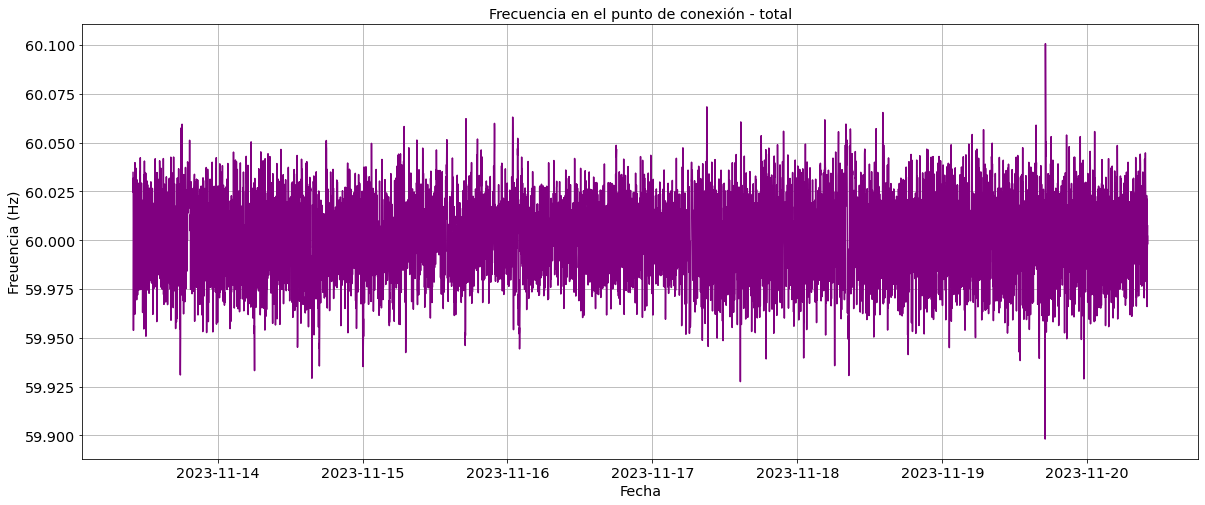

In [46]:
plt.figure(figsize=(20,8))
x1= freq['Fecha']
f1= freq['freq']
plt.plot(x1, f1, color='purple')

plt.title('Frecuencia en el punto de conexión - total')
plt.xlabel('Fecha')
plt.ylabel('Freuencia (Hz)')
plt.grid()
plt.show()

In [47]:
freq.describe(percentiles=[0.05, 0.95, 0.99])

,freq
count,10081.000000
mean,60.001167
std,0.020487
min,59.898151
5%,59.967972
50%,60.001141
95%,60.034210
99%,60.046261
max,60.100712
